<a href="https://colab.research.google.com/github/AnuragDingar/cloths_classification/blob/master/classify_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install tensorflow==2.0.0

     |████████████████████████████████| 86.3MB 65kB/s 
     |████████████████████████████████| 3.8MB 31.8MB/s 
     |████████████████████████████████| 450kB 47.3MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=51c81407ec02012dcfd2a4f79c583fb73424f429da93eff625f6d7000c207b08
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
  Found existing installation: tensorboard 2.2.0
    Uninstalling tensorboard-2.2.0:
      Successfully uninstalled tensorboard-2.2.0
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorflow-estimator 2.2.0rc0
    Uninstalling tensorflow-estimator-2.2.0rc0:
      Successfully uninstalled tensorflow-estimator-2.2.0rc0
  Found existing installation: tensorflow 2.2.0rc2
    Uninstalling tensorflow-2.2.0rc2:
      Successfully uninstalled tensorflow-2.2.0rc2

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.0.0


In [0]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels),(test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
train_images.shape

(60000, 28, 28)

In [0]:
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankel Boot']

In [0]:
len(train_labels)

60000

In [0]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [0]:
test_images.shape

(10000, 28, 28)

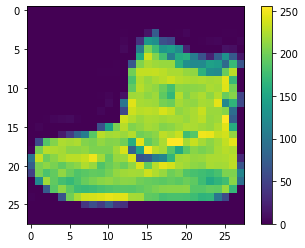

In [0]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
train_images = train_images / 255.0
test_images = test_images / 255.0

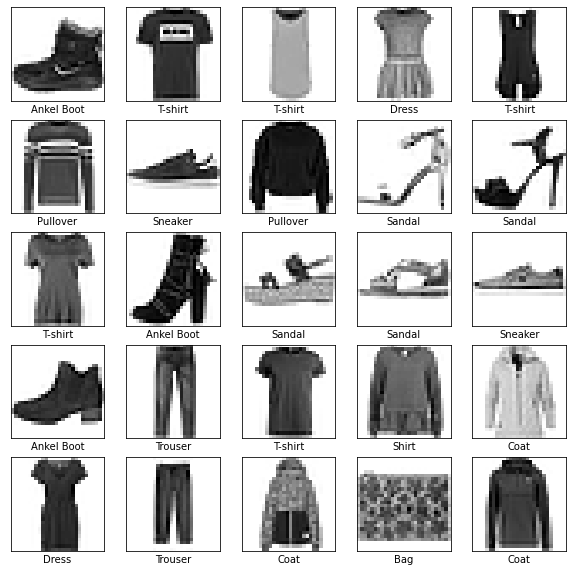

In [0]:
plt.figure(figsize = (10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])

plt.show()  

In [0]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(128, activation= 'relu'),
                          keras.layers.Dense(10, activation = 'softmax')
])

In [0]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [0]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 98us/sample - loss: 0.5039 - accuracy: 0.8248
Epoch 2/10
60000/60000 [==============================] - 5s 82us/sample - loss: 0.3769 - accuracy: 0.8653
Epoch 3/10
60000/60000 [==============================] - 5s 81us/sample - loss: 0.3398 - accuracy: 0.8763
Epoch 4/10
60000/60000 [==============================] - 5s 82us/sample - loss: 0.3128 - accuracy: 0.8851
Epoch 5/10
60000/60000 [==============================] - 5s 81us/sample - loss: 0.2979 - accuracy: 0.8893
Epoch 6/10
60000/60000 [==============================] - 5s 86us/sample - loss: 0.2819 - accuracy: 0.8941
Epoch 7/10
60000/60000 [==============================] - 5s 82us/sample - loss: 0.2708 - accuracy: 0.8990
Epoch 8/10
60000/60000 [==============================] - 5s 77us/sample - loss: 0.2591 - accuracy: 0.9036
Epoch 9/10
60000/60000 [==============================] - 5s 77us/sample - loss: 0.2478 - accuracy: 0.9069
Epoch 10/10
60

In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('\nTest accuracy:', test_acc)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [0]:
predictions = model.predict(test_images)

In [0]:
predictions[0]

array([3.0666607e-07, 1.0270126e-09, 4.9509541e-08, 2.0260826e-11,
       6.9494007e-08, 3.1602578e-03, 1.9295248e-08, 6.0116253e-03,
       4.3938300e-08, 9.9082774e-01], dtype=float32)

In [0]:
np.argmax(predictions[0])

9

In [0]:
test_labels[0]

9

In [0]:
img = test_images[0]
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [0]:
predictions_single = model.predict(img)
print(predictions_single)

[[3.0666638e-07 1.0270146e-09 4.9509445e-08 2.0260904e-11 6.9494270e-08
  3.1602590e-03 1.9295248e-08 6.0116313e-03 4.3938215e-08 9.9082774e-01]]


# New Section

# New Section